Wind Data Columns: Index(['time', 'r11i1p1f1', 'r10i1p2f1', 'r11i1p2f1', 'r13i1p1f1', 'r13i1p2f1',
       'r14i1p1f1', 'r10i1p1f1', 'r12i1p1f1', 'r12i1p2f1', 'r25i1p2f1',
       'r9i1p2f1', 'r8i1p2f1', 'r9i1p1f1', 'r4i1p1f1', 'r4i1p2f1', 'r5i1p2f1',
       'r6i1p1f1', 'r7i1p1f1', 'r7i1p2f1', 'r8i1p1f1', 'r5i1p1f1', 'r1i1p2f1',
       'r19i1p1f1', 'r20i1p1f1', 'r21i1p1f1', 'r22i1p1f1', 'r20i1p2f1',
       'r21i1p2f1', 'r1i1p1f1', 'r19i1p2f1', 'r24i1p1f1', 'r39i1p2f1',
       'r3i1p1f1', 'r38i1p2f1', 'r24i1p2f1', 'r40i1p2f1', 'r3i1p2f1',
       'r36i1p2f1', 'r37i1p2f1', 'r29i1p2f1', 'r27i1p2f1', 'r2i1p1f1',
       'r25i1p1f1', 'r26i1p2f1', 'r22i1p2f1', 'r23i1p2f1', 'r23i1p1f1',
       'r28i1p2f1', 'r18i1p1f1', 'r18i1p2f1', 'r17i1p1f1', 'r16i1p1f1',
       'r15i1p2f1', 'r15i1p1f1', 'r14i1p2f1', 'r2i1p2f1', 'r35i1p2f1',
       'r34i1p2f1', 'r30i1p2f1', 'r17i1p2f1', 'r16i1p2f1', 'r32i1p2f1',
       'r31i1p2f1', 'r33i1p2f1', 'r6i1p2f1'],
      dtype='object')
Sea Ice Data Columns: Index(['ti

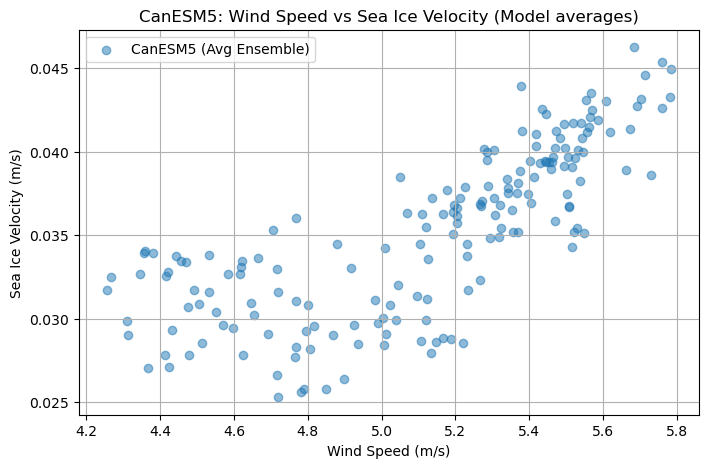

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

model_name = "CanESM5"
wind_file = f"../wind_speed_data/{model_name}_wind_speed.csv"
sea_ice_file = f"{model_name}_sivel.csv" 

wind_df = pd.read_csv(wind_file)
ice_df = pd.read_csv(sea_ice_file)

df = pd.merge(wind_df, ice_df, on="time")

print("Wind Data Columns:", wind_df.columns)
print("Sea Ice Data Columns:", ice_df.columns)

# dropping time column and avg across ensemble members
wind_speed_avg = df.filter(like="_x").mean(axis=1)
sea_ice_velocity_avg = df.filter(like="_y").mean(axis=1)

# plotting average
plt.figure(figsize=(8, 5))
plt.scatter(wind_speed_avg, sea_ice_velocity_avg, alpha=0.5, label=f"{model_name} (Avg Ensemble)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Sea Ice Velocity (m/s)")
plt.title(f"{model_name}: Wind Speed vs Sea Ice Velocity (Model averages)")
plt.legend()
plt.grid(True)
plt.show()

GISS-E2-1-G
CESM2
GISS-E2-1-H


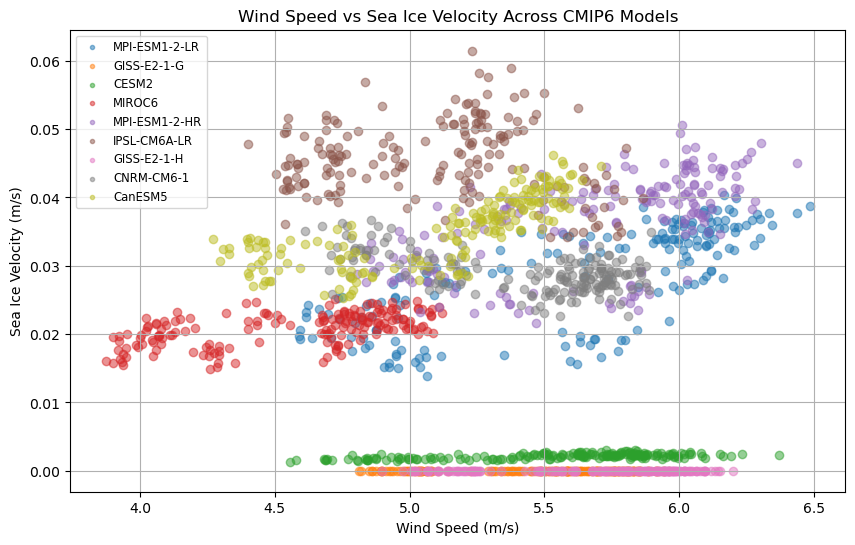

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

wind_folder = "../wind_speed_data/"
sea_ice_folder = "../sea_ice_velocity_data/"

wind_files = sorted(glob.glob(os.path.join(wind_folder, "*_wind_speed.csv")))
sea_ice_files = sorted(glob.glob(os.path.join(sea_ice_folder, "*_sivel.csv")))

wind_models = {os.path.basename(f).replace("_wind_speed.csv", ""): f for f in wind_files}
sea_ice_models = {os.path.basename(f).replace("_sivel.csv", ""): f for f in sea_ice_files}

# common models in both datasets
common_models = set(wind_models.keys()) & set(sea_ice_models.keys())

plt.figure(figsize=(10, 6))

for model in common_models:
    # load
    wind_df = pd.read_csv(wind_models[model], index_col="time", parse_dates=True)
    ice_df = pd.read_csv(sea_ice_models[model], index_col="time", parse_dates=True)

    # possible issue: seems like some wind dfs have different numbers of ensemble members
    # we should just average the ones that share all the same columns
    df = pd.merge(wind_df, ice_df, on="time")
    # instead of this merge step, you can do a step where if the columns are diff lengths,
    # then grab the columns shared by both

    
    wind_speed_avg = wind_df.mean(axis=1)
    sea_ice_velocity_avg = ice_df.mean(axis=1)

    if sea_ice_velocity_avg.max() < 0.01:
        # sea_ice_velocity_avg *= 100
        print(model)
    # break

    plt.scatter(wind_speed_avg, sea_ice_velocity_avg, alpha=0.5, label=model)

plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Sea Ice Velocity (m/s)")
plt.title("Wind Speed vs Sea Ice Velocity Across CMIP6 Models")
plt.legend(loc="best", fontsize="small", markerscale=0.5)
plt.grid(True)
plt.show()

In [ ]:
# For the three with low values: 
# follow up on the imputation error (filling with 0 instead of skipping nan's may be the issue)

In [49]:
wind_df = pd.read_csv(wind_models['MIROC6'])
ice_df = pd.read_csv(sea_ice_models['MIROC6'], index_col='time', parse_dates=True)
ice_df.head()

,r10i1p1f1,r1i1p1f1,r2i1p1f1,r3i1p1f1,r4i1p1f1,r5i1p1f1,r6i1p1f1,r7i1p1f1,r8i1p1f1,r9i1p1f1
time,,,,,,,,,,
2000-01-16 12:00:00,0.025059,0.020197,0.018037,0.018096,0.022645,0.023814,0.027842,0.021176,0.019669,0.024880
2000-02-15 12:00:00,0.022045,0.029068,0.018936,0.020936,0.022812,0.022213,0.025564,0.027978,0.023983,0.019419
2000-03-16 12:00:00,0.018521,0.014700,0.023207,0.019829,0.017595,0.021317,0.022283,0.020466,0.020457,0.021717
2000-04-16 00:00:00,0.019287,0.027487,0.026770,0.019116,0.022288,0.026034,0.026657,0.017092,0.014062,0.023472
2000-05-16 12:00:00,0.028249,0.009456,0.019172,0.020686,0.025817,0.025441,0.018236,0.013320,0.018826,0.019951


In [55]:
ice_df

,time,r10i1p1f1,r1i1p1f1,r2i1p1f1,r3i1p1f1,r4i1p1f1,r5i1p1f1,r6i1p1f1,r7i1p1f1,r8i1p1f1,r9i1p1f1
0,2000-01-16 12:00:00,0.046852,0.041969,0.025411,0.026137,0.029127,0.037821,0.033079,0.029088,0.037639,0.033355
1,2000-02-15 12:00:00,0.039864,0.032157,0.026392,0.034547,0.029799,0.034855,0.033667,0.036647,0.036199,0.033015
2,2000-03-16 12:00:00,0.040781,0.024901,0.033872,0.035631,0.042270,0.034784,0.035045,0.020754,0.031899,0.043500
3,2000-04-16 00:00:00,0.044392,0.032224,0.032784,0.039008,0.046176,0.031542,0.026679,0.030399,0.031149,0.031912
4,2000-05-16 12:00:00,0.024649,0.023768,0.022294,0.022878,0.027386,0.032702,0.039523,0.020046,0.033207,0.031785
...,...,...,...,...,...,...,...,...,...,...,...
175,2014-08-16 12:00:00,0.017196,0.018788,0.013461,0.015226,0.013076,0.012490,0.022289,0.018079,0.012803,0.014351
176,2014-09-16 00:00:00,0.020288,0.020990,0.018090,0.020775,0.014562,0.011715,0.020359,0.014811,0.020709,0.021118
177,2014-10-16 12:00:00,0.037627,0.033886,0.028909,0.031870,0.032777,0.024514,0.030425,0.027623,0.031086,0.028436
178,2014-11-16 00:00:00,0.031531,0.048669,0.038233,0.041943,0.025677,0.041772,0.027581,0.026436,0.039885,0.035073


- tandon finding: if you take u and v components to calcualte velocity, becauset heyre fuctaing around zero, mean will tend to be zero. if norm first then monthly averae, itll be muc higher.
- put observations in.
- teslls us drift speed ratio. we can see some of these models have significantly diff drift speeds. 

In [47]:
import os
print("Current directory:", os.getcwd())

Current directory: /Users/akikomotoki/Documents/Research/sea_ice_variability/Research/sea_ice_velocity_data


/opt/anaconda3/envs/sea_ice_env/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/sea_ice_env/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/sea_ice_env/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/sea_ice_env/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Pearson Correlation
MPI-ESM1-2-LR,0.738521
GISS-E2-1-G,NaN
CESM2,0.627747
MIROC6,0.552578
MPI-ESM1-2-HR,0.603761
IPSL-CM6A-LR,-0.092366
GISS-E2-1-H,NaN
CNRM-CM6-1,-0.524337
CanESM5,0.763491


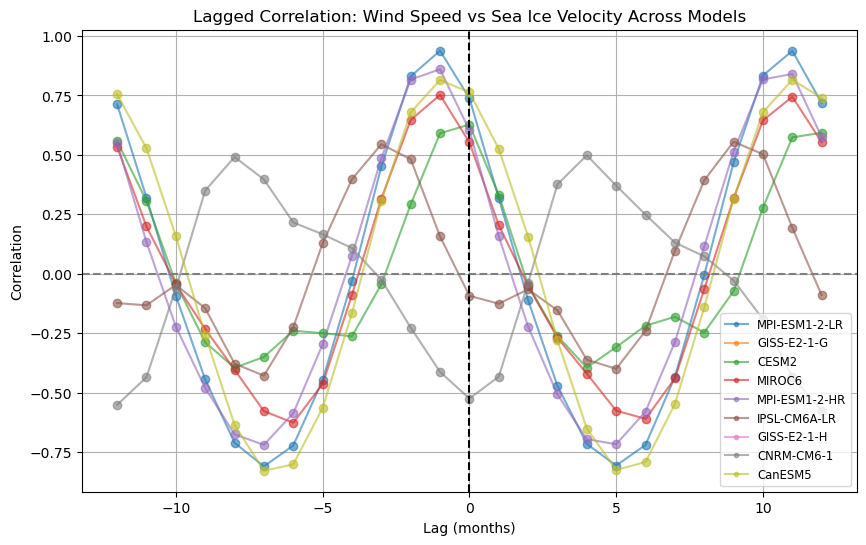

In [41]:
import numpy as np

correlation_results = {}
lagged_correlation_results = {}

# lag range (-12 to 12 months)
max_lag = 12
lags = np.arange(-max_lag, max_lag + 1)

plt.figure(figsize=(10, 6))

for model in common_models:

    # load
    wind_df = pd.read_csv(wind_models[model])
    ice_df = pd.read_csv(sea_ice_models[model])

    df = pd.merge(wind_df, ice_df, on="time")

    wind_speed_avg = df.iloc[:, 1:len(wind_df.columns)].mean(axis=1)
    sea_ice_velocity_avg = df.iloc[:, len(wind_df.columns):].mean(axis=1)

    # pearson correlation
    correlation = np.corrcoef(wind_speed_avg, sea_ice_velocity_avg)[0, 1]
    correlation_results[model] = correlation

    # lagged correlation
    lagged_corrs = []
    for lag in lags:
        if lag < 0:
            # wind speed leads (shift ice velocity forward)
            lagged_corr = np.corrcoef(wind_speed_avg[:lag], sea_ice_velocity_avg[-lag:])[0, 1]
        elif lag > 0:
            # ice velocity leads (shift wind speed forward)
            lagged_corr = np.corrcoef(wind_speed_avg[lag:], sea_ice_velocity_avg[:-lag])[0, 1]
        else:
            # no lag (regular correlation)
            lagged_corr = correlation
        lagged_corrs.append(lagged_corr)

    lagged_correlation_results[model] = lagged_corrs

    plt.plot(lags, lagged_corrs, marker="o", label=model, alpha=0.6)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("Lag (months)")
plt.ylabel("Correlation")
plt.title("Lagged Correlation: Wind Speed vs Sea Ice Velocity Across Models")
plt.legend(loc="best", fontsize="small", markerscale=0.5)
plt.grid(True)

# Convert correlation results to a DataFrame and display
correlation_df = pd.DataFrame.from_dict(correlation_results, orient="index", columns=["Pearson Correlation"])

from IPython.display import display
display(correlation_df)


1. Lagged Correlation Plot
- Positive lags (right side of the graph) indicate that sea ice velocity leads wind speed (i.e., sea ice movement happens before wind changes).
- Negative lags (left side of the graph) indicate that wind speed leads sea ice velocity (i.e., wind changes first, then sea ice responds).

- Most models show a strong correlation (~0.75 to 1.0) at certain positive and negative lags, suggesting that wind speed and sea ice velocity are highly related but with a delay.
- The symmetry in peaks (~6-month lag intervals) suggests an influence from seasonal cycles.\
  
2. Pearson Correlation Table
- table presents the direct (zero-lag) Pearson correlation between wind speed and sea ice velocity for each model.
- A high positive correlation (~0.5 to 0.76) for most models (e.g., CanESM5: 0.76, MPI-ESM1-2-LR: 0.74) indicates a strong linear relationship between wind and ice movement.
- Negative correlations (e.g., CNRM-CM6-1: -0.52) suggest opposite behavior, possibly due to regional effects or different ice dynamics in that model.

In [ ]:
drag coefficient